## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading Data

In [1]:
#Importing the libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd


In [2]:
# Read the given CSV file, and view some sample records

df = pd.read_csv('Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Understanding

In [3]:
df.shape
#observation : There are 730 rows and 16 columns.

(730, 16)

In [4]:
#summary of all the numeric columns
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#observations:

# There are 730 rows and 16 columns.
# Some fields looks like are categorical in nature, but in integer/float type.
# Except one column, all other are either float or integer type

In [7]:
# Data Dictionary (Given in problem statement)

# instant: record index
# 	- dteday : date
# 	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
# 	- yr : year (0: 2018, 1:2019)
# 	- mnth : month ( 1 to 12)
# 	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# 	- weekday : day of the week
# 	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# 	+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# 	- temp : temperature in Celsius
# 	- atemp: feeling temperature in Celsius
# 	- hum: humidity
# 	- windspeed: wind speed
# 	- casual: count of casual users
# 	- registered: count of registered users
# 	- cnt: count of total rental bikes including both casual and registered

## Data Quality Checks

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [10]:
# Checking for Duplicate rows in the dataset.
duplicate_rows = df.duplicated(subset=None, keep='first').sum()
print(duplicate_rows)

#observation: There is no duplicate row present

0


In [11]:
# Cheking details of columns if the they are nulls or blanks as value.
(df.isnull().sum()*100)/len(df)

#observation: No column is present which has null value

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [12]:
# Checking the number of columns which have NA values
len(df.columns[df.isna().all()].tolist())

#observation: No column is present which has NA value

0

In [13]:
#check which column has constant values
constant_columns = df.columns[df.nunique() <= 1].values.tolist()
constant_columns

#observation: No column has constant value


[]

## Data Cleaning

In [14]:
# From the given data, it seems column "instant" is auto-increment index value, which is not relevant for analysis. So, let's drop it.

df.drop(['instant'],axis=1,inplace=True)
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [15]:
# There is redundant data present, Yr and mnth represent dteday column which is basically date value. Yr and mnth is sufficient
# for further analysis. So, dteday can be dropped.

df.drop(['dteday'],axis=1,inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [16]:
# Target column is "cnt" which is derived by addition of  casual and registered column. So, casual and registered column is
# not required for further analysis, because of redundancy and can be dropped.

df.drop(['casual','registered'],axis=1,inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
df.info()
# Out of 16 columns, dataframe is left with 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Data Mapping for Categorical variables

In [18]:
# As season, month, weathersit, weekday are categorical variables. Let's replace all of them with appropriate value for data visualization.

df["season"] = df.season.map({1:"spring", 2:"summer",3:"fall", 4:"winter"})
df["mnth"]=df.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
df["weathersit"]=df.weathersit.map({1:"Clear",2:"Mist_Cloudy",3:"Light_Snow",4:"Snow_Fog"})
df["weekday"]=df.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## EDA - Data Visualization

In [20]:
# impoting required libraries for data visulaization
import matplotlib.pyplot as plt
import seaborn as sns

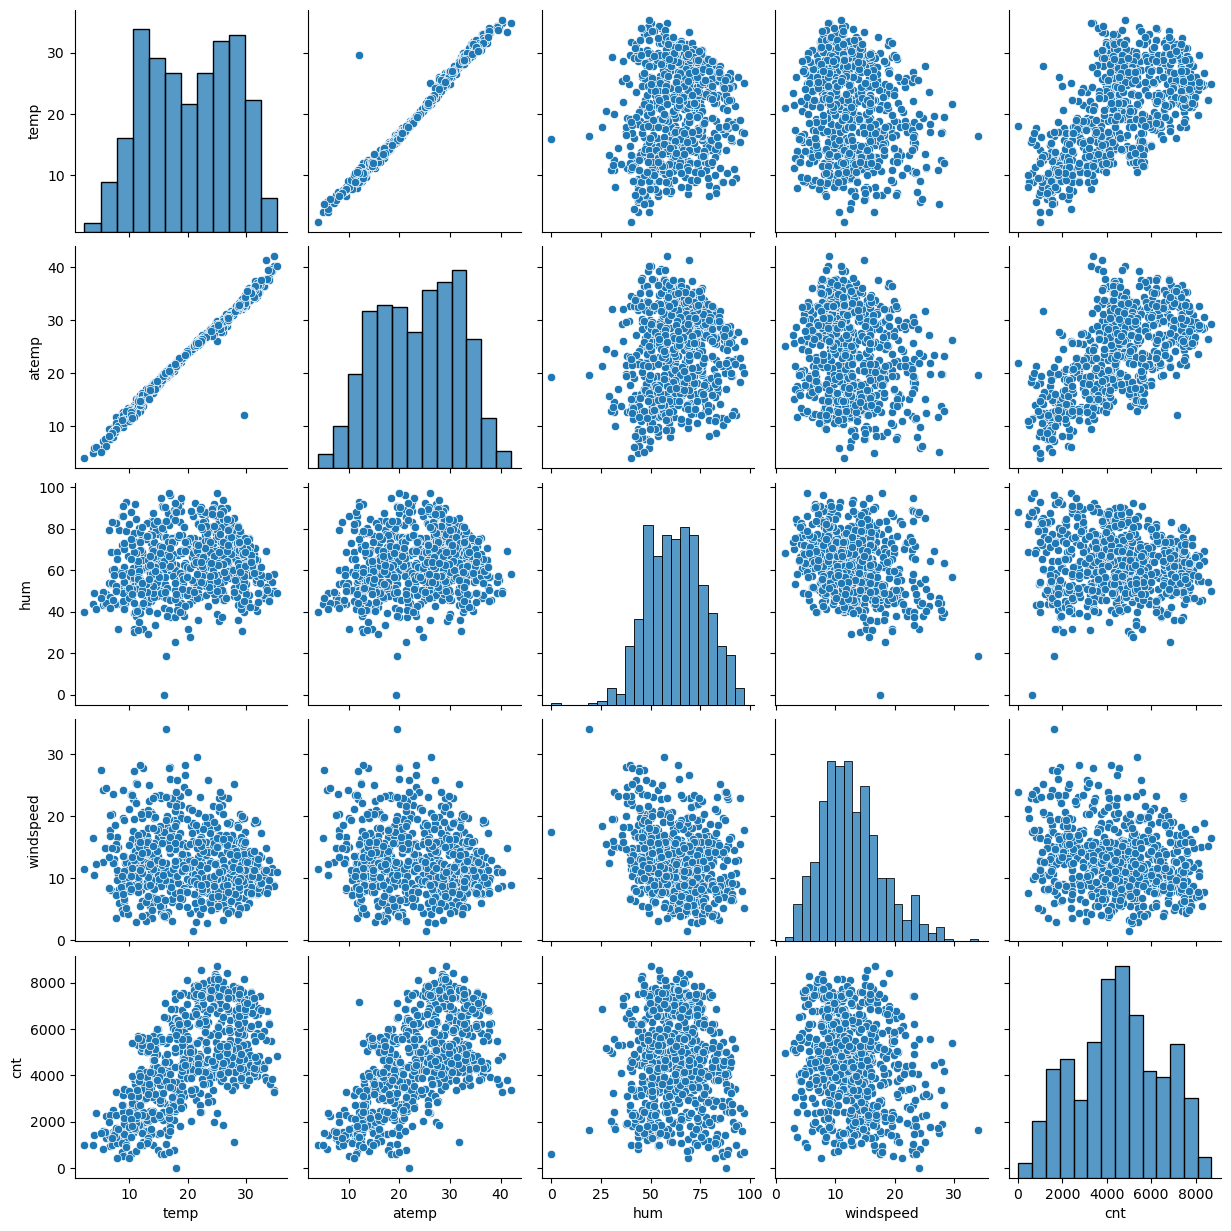

In [21]:
# Creating pairplots to understand Numerical variables

sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [22]:
#changing datatypes of numerical columns to appropriate types

df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


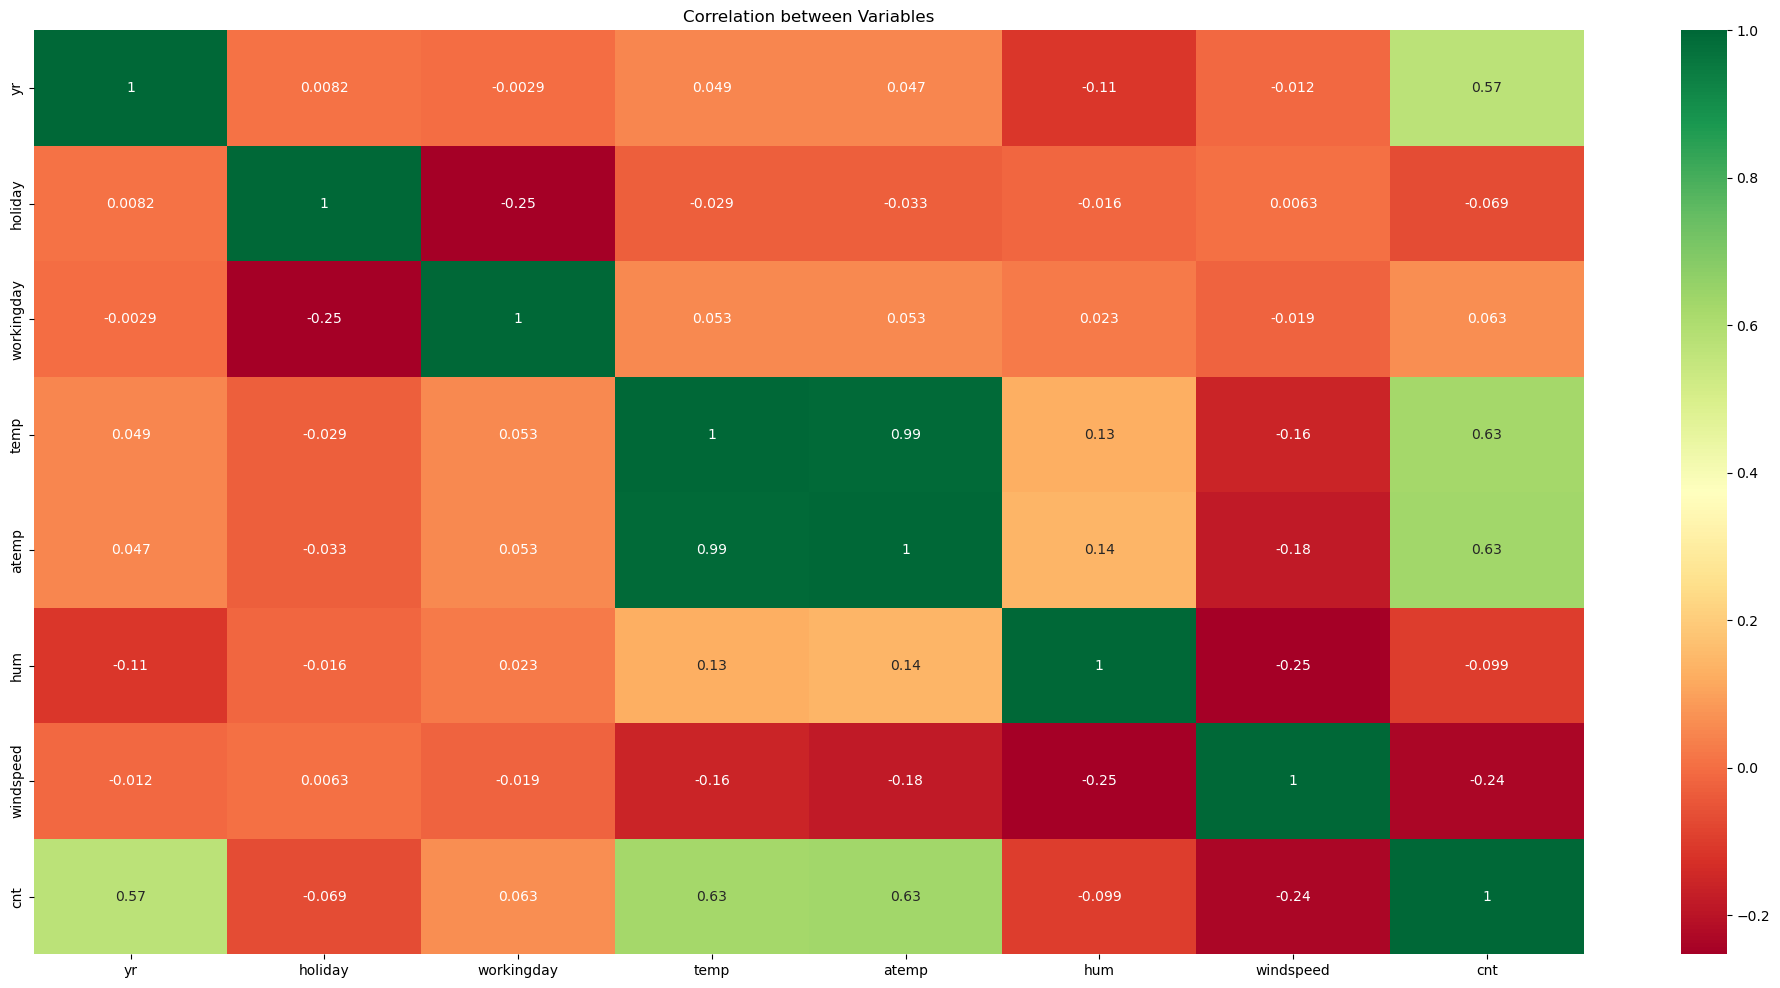

In [23]:
# as it can be observed temp and atemp seems very positive correlation with cnt

# Let's get correlation matrix
plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(numeric_only=True), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [24]:
# As there is high correlation(almost 1) between temp and atemp. Let's remove "temp" variable from df

df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


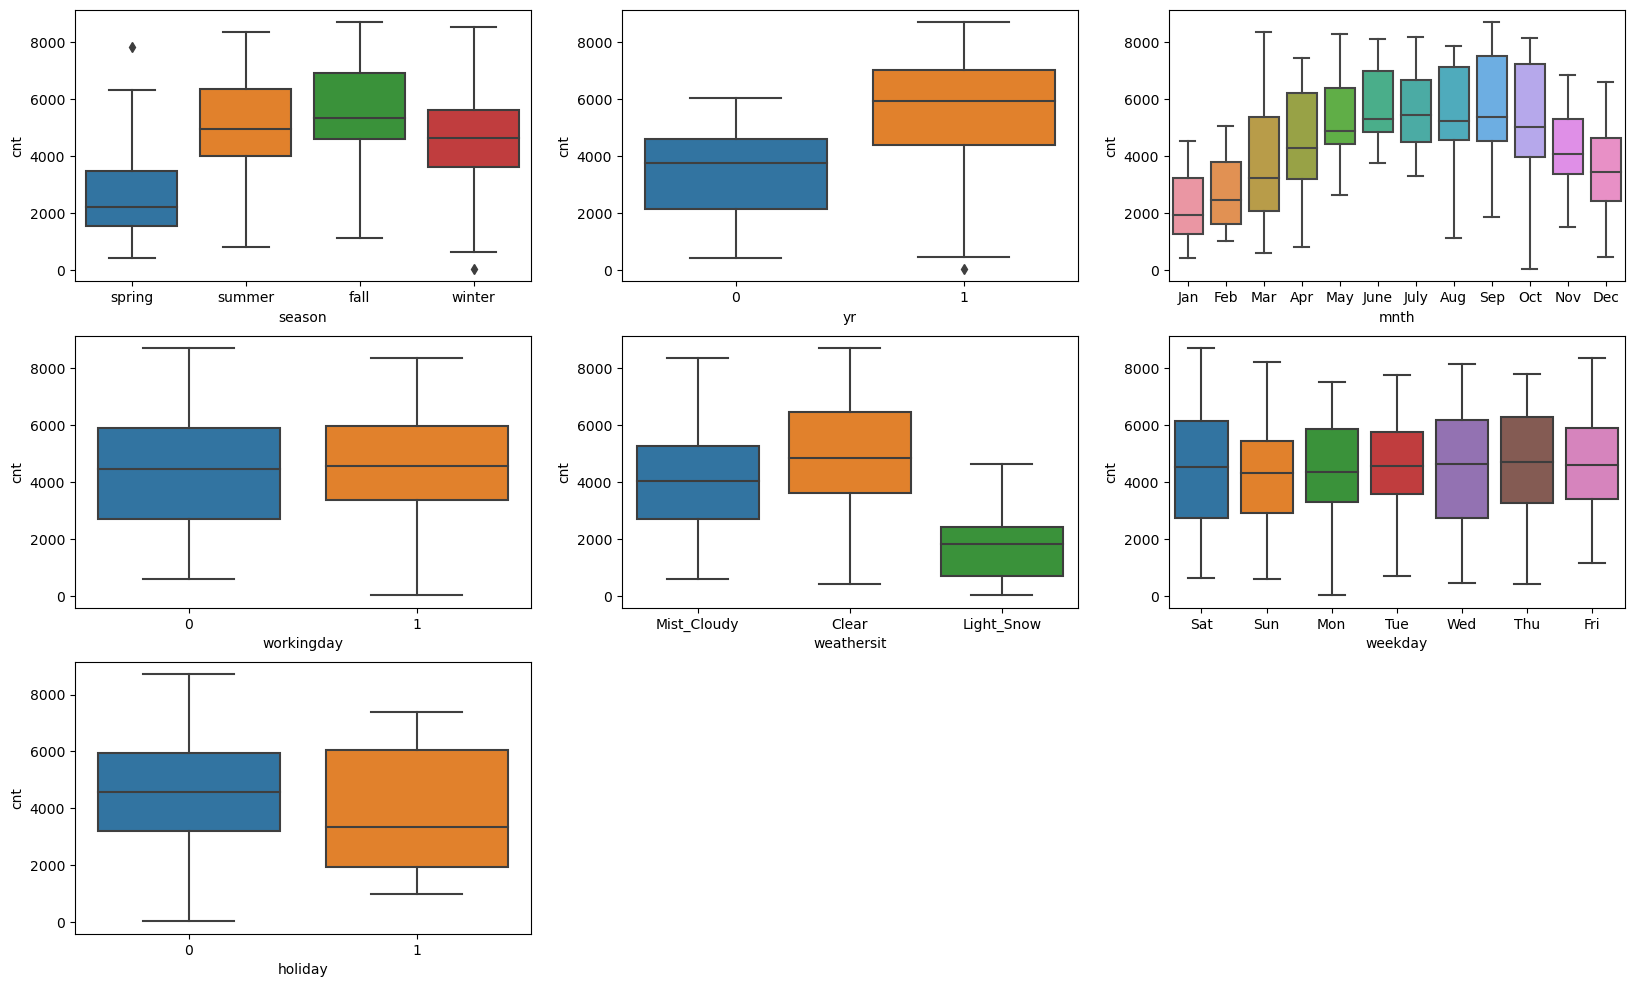

In [25]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)

plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)

plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)

plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)

plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)

plt.show()

In [26]:
#Observations:

# Bike Rentals are more :
    # during the Fall season and then in summer
    # in the year 2019 compared to 2018
    # in clear weather
    # on Saturday,wednesday and thursday

## Checking Datatypes

In [27]:
#checking dataypes for all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Data Preparation

### Dummy Variable

In [28]:
#Convert variables to object type
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [29]:
#Creating dummy variables

seasons=pd.get_dummies(df['season'],drop_first=True,dtype=int)
weather_sit=pd.get_dummies(df['weathersit'],drop_first=True,dtype=int)
weekdays=pd.get_dummies(df['weekday'],drop_first=True,dtype=int)
months=pd.get_dummies(df['mnth'],drop_first=True,dtype=int)

In [30]:
#Concatenate the result with df

df=pd.concat([months,weekdays,weather_sit,seasons,df],axis=1)

In [31]:
df.head(5)

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aug          730 non-null    int32  
 1   Dec          730 non-null    int32  
 2   Feb          730 non-null    int32  
 3   Jan          730 non-null    int32  
 4   July         730 non-null    int32  
 5   June         730 non-null    int32  
 6   Mar          730 non-null    int32  
 7   May          730 non-null    int32  
 8   Nov          730 non-null    int32  
 9   Oct          730 non-null    int32  
 10  Sep          730 non-null    int32  
 11  Mon          730 non-null    int32  
 12  Sat          730 non-null    int32  
 13  Sun          730 non-null    int32  
 14  Thu          730 non-null    int32  
 15  Tue          730 non-null    int32  
 16  Wed          730 non-null    int32  
 17  Light_Snow   730 non-null    int32  
 18  Mist_Cloudy  730 non-null    int32  
 19  spring  

In [33]:
#Deleting the orginal columns mnth, season, weathersit, weekday
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aug          730 non-null    int32  
 1   Dec          730 non-null    int32  
 2   Feb          730 non-null    int32  
 3   Jan          730 non-null    int32  
 4   July         730 non-null    int32  
 5   June         730 non-null    int32  
 6   Mar          730 non-null    int32  
 7   May          730 non-null    int32  
 8   Nov          730 non-null    int32  
 9   Oct          730 non-null    int32  
 10  Sep          730 non-null    int32  
 11  Mon          730 non-null    int32  
 12  Sat          730 non-null    int32  
 13  Sun          730 non-null    int32  
 14  Thu          730 non-null    int32  
 15  Tue          730 non-null    int32  
 16  Wed          730 non-null    int32  
 17  Light_Snow   730 non-null    int32  
 18  Mist_Cloudy  730 non-null    int32  
 19  spring  

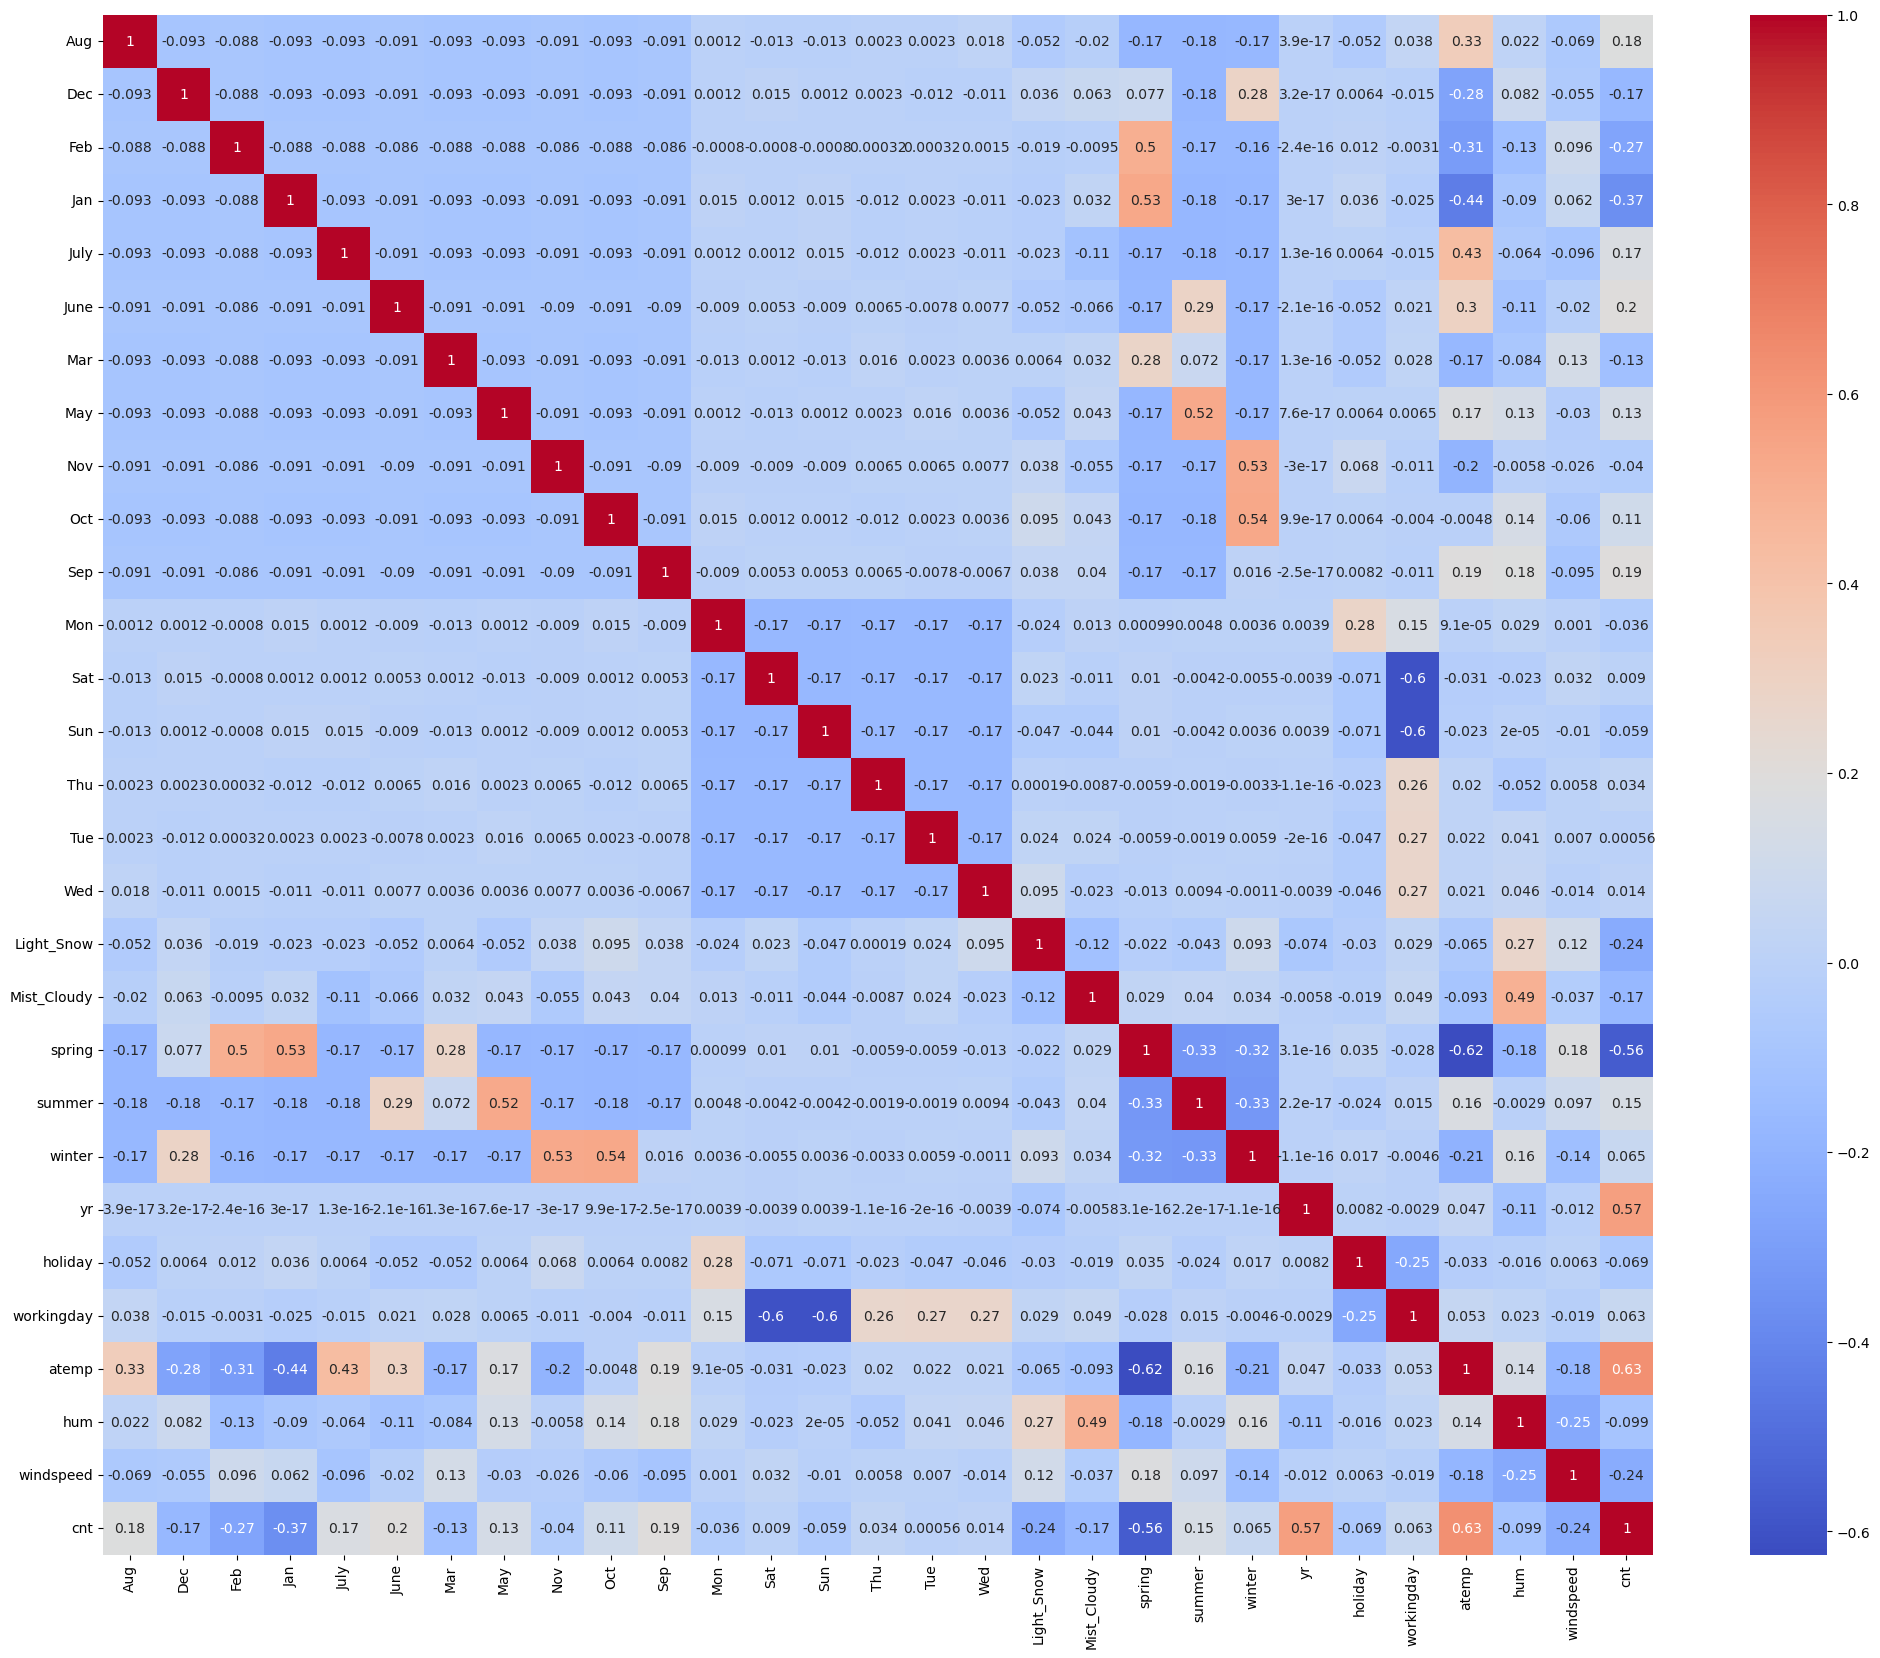

In [35]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)
plt.show()

In [36]:
# Observation : 
# atemp, yr and june to Sep month are in good positive relation with cnt.
# Spring and  lightshow season, Jan and Feb month are in negative relation with cnt.

## Data Splitting 

In [37]:
# Before model building, let's split the data into train-test data

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [38]:
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,18.8752,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,16.0977,72.9583,14.707907,1683


In [39]:
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,33.27085,63.7917,5.459106,6043
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,36.04875,59.2083,7.625404,6211
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,22.85230,81.2917,13.250121,2659
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,34.24915,42.4167,13.417286,4780
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,32.19710,30.5000,19.583229,4968


In [40]:
#shape of train and test df
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## Feature Scaling

In [41]:
# To bring all variables on the same scale, there are different ways like Min-Max scaling and Standardization method.
# Let's use Min-Max scaling for scaling.

### Min-Max Scaling

In [42]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Min Max scaler object
scaler = MinMaxScaler()

#list of numeric variables
num_vars=['atemp','hum','windspeed','cnt']

In [44]:
#Fit and transform the data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.766351,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.200348,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.391735,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.318819,0.751824,0.380981,0.191095


In [45]:
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# X and Y dtaset creation from df_train

y_train = df_train.pop('cnt')
X_train = df_train

In [47]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist_Cloudy,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0.766351,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,1,0,0,0.438975,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0.200348,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0.391735,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0.318819,0.751824,0.380981


In [48]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Creating Model

In [49]:
# We will use LinearRegression function from SciKit Learn for its compatibility with RFE(Recursive feature elimination)

In [50]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train) 

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 8),
 ('June', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 5),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('spring', False, 4),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [53]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Aug', 'Feb', 'Jan', 'Sep', 'Sat', 'Light_Snow', 'Mist_Cloudy',
       'summer', 'winter', 'yr', 'holiday', 'workingday', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

In [54]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun', 'Thu',
       'Tue', 'Wed', 'spring'],
      dtype='object')

## Building model using statsmodel

In [55]:
X_train_rfe = X_train[col]

In [56]:
# Multicollinearity: Assumes that predictors are not correlated with each other. If there is any correlation among the predictors

## Model 1

In [57]:
# BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [58]:
X_train_rfe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        510 non-null    float64
 1   Aug          510 non-null    int32  
 2   Feb          510 non-null    int32  
 3   Jan          510 non-null    int32  
 4   Sep          510 non-null    int32  
 5   Sat          510 non-null    int32  
 6   Light_Snow   510 non-null    int32  
 7   Mist_Cloudy  510 non-null    int32  
 8   summer       510 non-null    int32  
 9   winter       510 non-null    int32  
 10  yr           510 non-null    int64  
 11  holiday      510 non-null    int64  
 12  workingday   510 non-null    int64  
 13  atemp        510 non-null    float64
 14  hum          510 non-null    float64
 15  windspeed    510 non-null    float64
dtypes: float64(4), int32(9), int64(3)
memory usage: 49.8 KB


In [59]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [60]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          8.05e-188
Time:                        20:16:22   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2208      0.032      6.910      

### Calculating VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.



In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining a generic method to re-use it with every model

def check_VIF(X_train_rf):
    vif = pd.DataFrame()
    X = X_train_rf
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

check_VIF(X_train_rfe)

,Features,VIF
13,hum,22.78
12,atemp,13.21
11,workingday,5.15
14,windspeed,4.02
8,winter,2.41
7,summer,2.21
6,Mist_Cloudy,2.19
9,yr,2.06
4,Sat,1.93
2,Jan,1.81


## Model 2

In [62]:
# Column feburary is insignificant because of high p-value and low VIF, let's remove it

In [63]:
# Drop Feburary
X_train_rfe = X_train_rfe.drop(["Feb"], axis = 1)

In [64]:
X_train_rfe2 = sm.add_constant(X_train_rfe)

In [65]:
lm2 = sm.OLS(y_train,X_train_rfe2).fit()

In [66]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.52e-188
Time:                        20:16:22   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2064      0.030      6.818      

In [67]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
12,hum,20.07
11,atemp,11.71
10,workingday,5.09
13,windspeed,3.83
5,Mist_Cloudy,2.16
8,yr,2.04
7,winter,2.03
6,summer,1.97
3,Sat,1.92
1,Jan,1.57


## Model 3

In [68]:
# Column holiday is insignificant because of high p-value, let's remove it

In [69]:
# Drop Holiday
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [70]:
X_train_rfe3 = sm.add_constant(X_train_rfe)

In [71]:
lm3 = sm.OLS(y_train,X_train_rfe3).fit()

In [72]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          6.87e-189
Time:                        20:16:22   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1971      0.030      6.574      

In [73]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
11,hum,19.69
10,atemp,11.71
9,workingday,4.59
12,windspeed,3.77
5,Mist_Cloudy,2.15
8,yr,2.04
7,winter,2.02
6,summer,1.97
3,Sat,1.81
0,Aug,1.56


## Model 4

In [74]:
# Because of high VIF value for column hum, let's remove hum and see outcomes
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()

In [75]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          3.96e-186
Time:                        20:16:23   Log-Likelihood:                 499.50
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     497   BIC:                            -918.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1057      0.022      4.908      

In [76]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
10,atemp,6.22
9,workingday,4.31
11,windspeed,3.56
8,yr,2.04
6,summer,1.93
3,Sat,1.76
7,winter,1.60
5,Mist_Cloudy,1.57
0,Aug,1.56
2,Sep,1.31


## Model 5

In [77]:
# Because of high VIF value for column atemp, let's remove it

X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()

In [78]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          6.17e-125
Time:                        20:16:23   Log-Likelihood:                 351.63
No. Observations:                 510   AIC:                            -679.3
Df Residuals:                     498   BIC:                            -628.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4056      0.020     19.875      

In [79]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
9,workingday,3.44
10,windspeed,3.31
8,yr,1.91
6,summer,1.76
3,Sat,1.59
7,winter,1.58
5,Mist_Cloudy,1.57
0,Aug,1.29
1,Jan,1.26
2,Sep,1.16


## Model 6

#### Let's try to add more features from next level provided by RFE and see the model statistics

In [80]:
# Adding col Dec to train df

X_train_rfe[["Dec"]] = X_train[["Dec"]]
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()

In [81]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     108.0
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          5.60e-130
Time:                        20:16:23   Log-Likelihood:                 366.09
No. Observations:                 510   AIC:                            -706.2
Df Residuals:                     497   BIC:                            -651.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4190      0.020     20.936      

In [82]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
9,workingday,3.49
10,windspeed,3.31
8,yr,1.91
6,summer,1.78
7,winter,1.69
3,Sat,1.61
5,Mist_Cloudy,1.58
0,Aug,1.30
1,Jan,1.26
11,Dec,1.25


In [83]:
#Observation: we see our P-Value and VIF is good and R-squared has also increased, which is good

# Let's continue by adding next level feature to see model health

## Model 7

In [84]:
# Adding col Nov to train df

X_train_rfe[["Nov"]]=X_train[["Nov"]]
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()

In [85]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.03e-132
Time:                        20:16:23   Log-Likelihood:                 375.07
No. Observations:                 510   AIC:                            -722.1
Df Residuals:                     496   BIC:                            -662.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4241      0.020     21.503      

In [86]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
9,workingday,3.49
10,windspeed,3.35
7,winter,2.52
8,yr,1.91
6,summer,1.79
12,Nov,1.78
3,Sat,1.61
5,Mist_Cloudy,1.58
11,Dec,1.42
0,Aug,1.30


In [87]:
#Observation: we see our P-Value and VIF is good and R-squared has also increased, which is good

# Let's continue by adding next level feature to see model health

## Model 8

In [88]:
# Adding col Nov to train df

X_train_rfe[["spring"]]=X_train[["spring"]]
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()

In [89]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     139.9
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          7.95e-162
Time:                        20:16:23   Log-Likelihood:                 447.08
No. Observations:                 510   AIC:                            -864.2
Df Residuals:                     495   BIC:                            -800.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5274      0.019     27.799      

In [90]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
10,windspeed,4.25
9,workingday,3.75
13,spring,3.19
7,winter,3.13
6,summer,2.46
8,yr,1.93
12,Nov,1.78
3,Sat,1.67
1,Jan,1.64
5,Mist_Cloudy,1.60


In [91]:
#Observation: R-squared has given great number by adding above columns, VIF is also good, But P-value for winter and Aug col is not acceptable

# Let's drop winter column and see the effect

## Model 9

In [92]:
# Because of high p-value for column winter, let's remove it

X_train_rfe = X_train_rfe.drop(["winter"], axis = 1)
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()

In [93]:
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          6.40e-163
Time:                        20:16:23   Log-Likelihood:                 447.07
No. Observations:                 510   AIC:                            -866.1
Df Residuals:                     496   BIC:                            -806.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5262      0.017     31.023      

In [94]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
9,windspeed,3.99
8,workingday,3.50
12,spring,2.57
6,summer,2.04
7,yr,1.90
1,Jan,1.63
3,Sat,1.61
5,Mist_Cloudy,1.56
0,Aug,1.36
11,Nov,1.29


In [95]:
# Observation: R-squeared and VIF is good

# For Aug feature variable p-value is high, let's remove it

## Model 10

In [96]:
# Because of high p-value for column Aug, let's remove it

X_train_rfe = X_train_rfe.drop(["Aug"], axis = 1)
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()

In [97]:
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.00e-163
Time:                        20:16:23   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5348      0.016     33.009      

In [98]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
8,windspeed,3.92
7,workingday,3.21
11,spring,2.38
6,yr,1.87
5,summer,1.79
0,Jan,1.63
2,Sat,1.54
4,Mist_Cloudy,1.54
10,Nov,1.22
1,Sep,1.20


## Model 11

In [99]:
# Adding col Sun to train df

X_train_rfe[["Sun"]]=X_train[["Sun"]]
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()

In [100]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.11e-162
Time:                        20:16:23   Log-Likelihood:                 446.50
No. Observations:                 510   AIC:                            -865.0
Df Residuals:                     496   BIC:                            -805.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4993      0.032     15.789      

In [101]:
#checking VIF

check_VIF(X_train_rfe)

,Features,VIF
7,workingday,4.90
8,windspeed,4.76
11,spring,2.41
6,yr,2.01
2,Sat,1.95
5,summer,1.86
12,Sun,1.78
0,Jan,1.63
4,Mist_Cloudy,1.57
10,Nov,1.25


In [102]:
# Observation: After adding next level feature given by RFE i.e. Sun, the p-value for Sun is not acceptable.

# so,the best model which has arrived is Model 10 (i.e. lm10). The model has significant p-value and no multicollinearity
# because all VIF value are less than 5. Let's use it for prediction on test data and for further analysis.

## Residual Analysis of the train data
Assumption : Error terms are normally distributed with mean zero

In [103]:
#Predict values
y_train_cnt = lm10.predict(X_train_rfe10)

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
#CALCULATING RESIDUALS

res = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

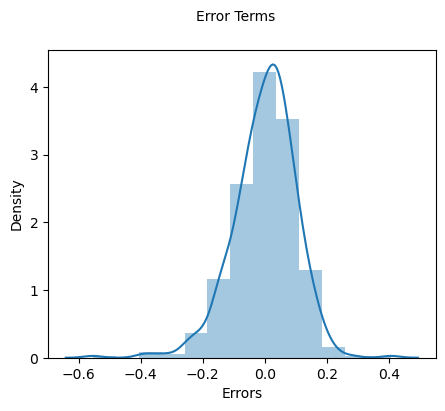

In [106]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5, 4))
sns.distplot((res), bins = 13)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10) 

In [107]:
# From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Making Predictions Using the Best Model i.e. lm10 (Model 10)

In [108]:
X_train_rfe10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   const        510 non-null    float64
 1   Jan          510 non-null    int32  
 2   Sep          510 non-null    int32  
 3   Sat          510 non-null    int32  
 4   Light_Snow   510 non-null    int32  
 5   Mist_Cloudy  510 non-null    int32  
 6   summer       510 non-null    int32  
 7   yr           510 non-null    int64  
 8   workingday   510 non-null    int64  
 9   windspeed    510 non-null    float64
 10  Dec          510 non-null    int32  
 11  Nov          510 non-null    int32  
 12  spring       510 non-null    int32  
dtypes: float64(2), int32(9), int64(2)
memory usage: 37.9 KB


In [109]:
#Scaling the test data
num_vars=['atemp','hum','windspeed','cnt']

In [110]:
# fit and transform
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [111]:
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,yr,holiday,workingday,atemp,hum,windspeed,cnt
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.778767,0.534223,0.149393,0.704300
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.855132,0.470417,0.231142,0.725421
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.492359,0.777843,0.443398,0.278853
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.805661,0.236659,0.449707,0.545512
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.749249,0.070765,0.682387,0.569148


### Dividing into X_test and y_test

In [112]:
#Creating x and y sets

y_test = df_test.pop('cnt')
X_test = df_test

In [113]:
test_cols = X_train_rfe10.drop(['const'], axis=1).columns

In [114]:
test_cols

Index(['Jan', 'Sep', 'Sat', 'Light_Snow', 'Mist_Cloudy', 'summer', 'yr',
       'workingday', 'windspeed', 'Dec', 'Nov', 'spring'],
      dtype='object')

In [115]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[test_cols]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [116]:
#Making predictions on the chosen model

y_pred = lm10.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

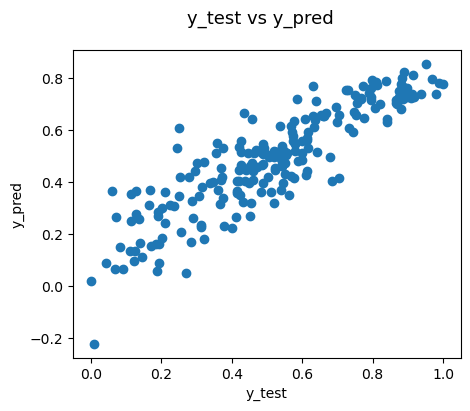

In [117]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure(figsize=(5, 4))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=13)              # Plot heading 
plt.xlabel('y_test', fontsize=10)                          # X-label
plt.ylabel('y_pred', fontsize=10)   

In [118]:
# We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

## R-squared for Test data

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
from sklearn.metrics import r2_score

In [121]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11565060647146391

In [122]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.76575520411279

## Adjusted R-Squared for Test

In [123]:
r2 = 0.76575520411279

In [124]:
# Get the shape of X_test
X_test.shape

(220, 28)

In [125]:
# Calculating Adjusted R-squared using the formula
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7314156528832514

In [126]:
# Stats for best model i.e. lm10
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.7
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.00e-163
Time:                        20:16:24   Log-Likelihood:                 445.62
No. Observations:                 510   AIC:                            -865.2
Df Residuals:                     497   BIC:                            -810.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5348      0.016     33.009      

In [127]:
print(lm10.params)

const          0.534846
Jan           -0.123239
Sep            0.056253
Sat            0.066420
Light_Snow    -0.320213
Mist_Cloudy   -0.088972
summer        -0.038534
yr             0.246073
workingday     0.057099
windspeed     -0.192618
Dec           -0.118282
Nov           -0.112201
spring        -0.237612
dtype: float64


### The equation for the best fitted line is:

cnt =  0.534846 + (-0.123239 x Jan) + (0.056253 x Sep) + (0.066420 x Sat)+ (-0.320213 x Light_Snow)+ (-0.088972 x Mist_Cloudy) + (-0.038534 x summer) + (0.246073 x yr) + (0.057099 x workingday) + (-0.192618 x windspeed) + (-0.118282 x Dec) + (-0.112201 x Nov) + (-0.237612 x spring)


## Analysis Comparison between train and test model:

In [128]:
# Train - R^2 : 0.797 i.e. 79.7%
# Test - R^2: 0.765 i.e. 76.5%
# Difference in R^2 between train and test: 3.2%
# As the difference between train and test R^2 is less than 5%, so, it can be considered as best model.

## Final Analysis

In [129]:
# As per our above analysis and based on model i.e. lm10.

# The demand of bikes depends upons below variables
# Jan, Sep, Sat, Light_Snow, Mist_Cloudy, summer, yr, workingday, windspeed, Dec, Nov, spring

# Demands get increase in the Saturday, September, workingday and with the year
# Demands get decrease in November, December, Lightining, snow, Mist, cloudy, windspeed and spring

# Weather situation is critical to bike sale, clear and partly cloudy weather will reflect more rentals.
# Working days have good influence on bike sale.
# Windspeed affects Bikes sale with negative correlation, Lesser the windspeed more will be bike rentals.
# On increasing Temperature bike demands increase significantly because of strong correlation in both.